#Grae prediction using Parallel Random Forest
 
    Grading is necessary tool for measure outcome of the sudying process. Unsuccessful lerning process may depend on many factors such as student attenction, teacher and background knowledge. In many academic instituetions, the prerequisite subjects are required before registering some particular subjects. In this project, we attempt to investigate the relationship between prerequisite grades on a grade of the paricular subject. We have aquired a anonymous enrolment records of computer science students from the registrar of Thammasat University. The records have been constantly collected for 4 years consisting of over 28,272 records.

In [1]:
import pandas as pd
import numpy as np
print pd.__version__
%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
df_csv = pd.read_csv('CS_table_No2_No4_new.csv',delimiter=";",
                      skip_blank_lines = True, error_bad_lines=False)
df_csv=df_csv.dropna()

0.18.0


C:\Anaconda\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
print df_csv.head() #get first 5 records

   STUDENTID  ACADYEAR  SEMESTER  CAMPUSID COURSEID CAMPUSNAME  CURRIC  \
0     316644      2552         1         2    CS101    RANGSIT     521   
1     316644      2552         1         2    CS102    RANGSIT     521   
2     316644      2552         1         2    EL171    RANGSIT     521   
3     316644      2552         1         2    SC135    RANGSIT     521   
4     316644      2552         1         2    SC185    RANGSIT     521   

                          COURSENAME  SECTIONGROUP  CREDIT GRADE  
0                DISCRETE STRUCTURES         10001       3     C  
1  COMPUTER PROGRAMMING FUNDAMENTALS         20301       4     C  
2                   ENGLISH COURSE 2        100003       3     D  
3                    GENERAL PHYSICS         80001       3     F  
4        GENERAL PHYSICS  LABORATORY          5401       1     C  


In [3]:
print df_csv.tail() #get lat 5 records

       STUDENTID  ACADYEAR  SEMESTER  CAMPUSID COURSEID CAMPUSNAME  CURRIC  \
31332     447243      2557         1         2    EL070    RANGSIT     561   
31333     447243      2557         1         2    MA211    RANGSIT     561   
31334     447243      2557         1         2    ST216    RANGSIT     561   
31335     447243      2557         1         2    TH161    RANGSIT     561   
31336     447243      2557         1         2    TU154    RANGSIT     561   

                               COURSENAME  SECTIONGROUP  CREDIT GRADE  
31332                    ENGLISH COURSE 1        650001       3    U#  
31333                          CALCULUS 1        650001       3     F  
31334  STATISTICS  FOR  SOCIAL  SCIENCE 1        650001       3     F  
31335                          THAI USAGE        650002       3     F  
31336           FOUNDATION OF MATHEMATICS        650001       3     F  


#Data minning process
The normal procedures for data mininng are the following:
* data cleaning
* data transformation
* training
* evaluation

##Drop unnecessary data
    Some column are unnecessary for the prediction. We can drop them by using df.drop()
```python
        df_csv.drop(["column_name"])
```

In [4]:
column_name=df_csv.columns.values
print column_name
for i in column_name:
    print "datatype of column {} is {}.".format(i,df_csv[i].dtype)

['STUDENTID' 'ACADYEAR' 'SEMESTER' 'CAMPUSID' 'COURSEID' 'CAMPUSNAME'
 'CURRIC' 'COURSENAME' 'SECTIONGROUP' 'CREDIT' 'GRADE']
datatype of column STUDENTID is int64.
datatype of column ACADYEAR is int64.
datatype of column SEMESTER is int64.
datatype of column CAMPUSID is int64.
datatype of column COURSEID is object.
datatype of column CAMPUSNAME is object.
datatype of column CURRIC is int64.
datatype of column COURSENAME is object.
datatype of column SECTIONGROUP is int64.
datatype of column CREDIT is int64.
datatype of column GRADE is object.


In [5]:
df_csv.drop(['CAMPUSID','CAMPUSNAME','COURSENAME','CURRIC','SECTIONGROUP','CREDIT'],
            axis=1, inplace=True)
column_name=df_csv.columns.values
print column_name
for i in column_name:
    print "datatype of column {} is {}.".format(i,df_csv[i].dtype)

['STUDENTID' 'ACADYEAR' 'SEMESTER' 'COURSEID' 'GRADE']
datatype of column STUDENTID is int64.
datatype of column ACADYEAR is int64.
datatype of column SEMESTER is int64.
datatype of column COURSEID is object.
datatype of column GRADE is object.


##Data cleaning
    There are some records having NAN ann invalid data. We need to fix or remove them.

C     5075
C+    4939
B     4228
B+    3411
A     3187
D+    2600
D     1792
W     1690
F     1062
S#     206
S       36
U       27
U#      19
Name: GRADE, dtype: int64


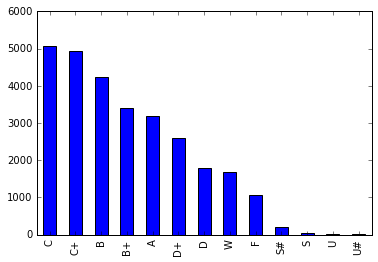

In [6]:
df=df_csv.copy()
myhist=df["GRADE"].value_counts()
print myhist
myhist.plot(kind='bar')

In [7]:
#replacing grade letter by number
def cat_to_num(_df,colName,ascending=True):
    def cat_to_num(key):
        return cat2num[key]
    myhist=_df[colName].value_counts()        
    cat_list=myhist.sort_index(ascending=ascending).index
    print "cat_list: "
    print cat_list
    cat2num={}
    num2cat={}
    for i,x in enumerate(cat_list):
        cat2num[x]=i
        num2cat[i]=x
    _df[colName]=_df[colName].apply(cat_to_num)
    return (num2cat,cat2num)
    
df2=df.copy()
grade_nc,grade_cn=cat_to_num(df2,"GRADE",ascending=False)
# for i in grade_nc:
#     print "'{:3d}', {}".format(i,grade_nc[i])
##courseid_nc,courseid_cn=cat_to_num(df2,"COURSEID")
# for i in courseid_nc:
#     print "'{:3d}', {}".format(i,courseid_nc[i])
##studentid_nc,studentid_cn=cat_to_num(df2,"STUDENTID")

cat_list: 
Index([u'W', u'U#', u'U', u'S#', u'S', u'F', u'D+', u'D', u'C+', u'C', u'B+',
       u'B', u'A'],
      dtype='object')


##converting category to numeric data
```python
        _df=df.copy()
        colName="COURSEID"
        def cat_to_num(key):
            return cat2num[key]
        myhist=_df[colName].value_counts()        
        cat_list=myhist.sort_index().index
        print "cat_list: "
        print cat_list
        cat2num={}
        num2cat={}
        for i,x in enumerate(cat_list):
            cat2num[x]=i
            num2cat[i]=x
        _df[colName]=_df[colName].apply(cat_to_num)
```

In [8]:
myhist=df["GRADE"].value_counts()
print myhist
myhist2=df2["GRADE"].value_counts()
print myhist2

C     5075
C+    4939
B     4228
B+    3411
A     3187
D+    2600
D     1792
W     1690
F     1062
S#     206
S       36
U       27
U#      19
Name: GRADE, dtype: int64
9     5075
8     4939
11    4228
10    3411
12    3187
6     2600
7     1792
0     1690
5     1062
3      206
4       36
2       27
1       19
Name: GRADE, dtype: int64


In [9]:
df2["TERM"]=10*df2["ACADYEAR"]+df2["SEMESTER"]
df3=df2.copy()
df3.drop(["ACADYEAR","SEMESTER"],axis=1, inplace=True)

In [10]:
print df3.head()
print df3.tail()

   STUDENTID COURSEID  GRADE   TERM
0     316644    CS101      9  25521
1     316644    CS102      9  25521
2     316644    EL171      7  25521
3     316644    SC135      5  25521
4     316644    SC185      9  25521
       STUDENTID COURSEID  GRADE   TERM
31332     447243    EL070      1  25571
31333     447243    MA211      5  25571
31334     447243    ST216      5  25571
31335     447243    TH161      5  25571
31336     447243    TU154      5  25571


We need to create a new dataframe that has pattern, where pattern is a set of grades from studied subjects.

In [11]:
#df4=df3[0:20].copy()
df4=df3

In [12]:
#create a new data frame
df5=df4.copy()
for c in df5.COURSEID.value_counts().index:
    df5[c]=pd.Series(-1*np.ones(df5.shape[0],dtype=int),index=df5.index)
#reindex the columns
cname=df5.columns[0:4].values.tolist() + sorted(df5.columns[4:].values)
df5=df5.reindex_axis(cname, axis=1)

In [13]:
%%timeit -n1
for i, ri in df5.iterrows():
    dfx=df4[ (df4["STUDENTID"] == ri["STUDENTID"]) & (df4["TERM"] < ri["TERM"]) ]
    if(dfx.shape[0]):
        for j,rj in dfx.iterrows():
            df5.loc[i,rj["COURSEID"]]=rj["GRADE"]

1 loops, best of 3: 14min 48s per loop


In [14]:
df5.to_pickle("df5.pkl")
#df = pd.read_pickle("df5.pkl")

In [15]:
df6 = pd.read_pickle("df5.pkl")

In [16]:
df6

STUDENTID COURSEID  GRADE   TERM  AN201  AS171  AS177  AS178  AT207  \
0         316644    CS101      9  25521     -1     -1     -1     -1     -1   
1         316644    CS102      9  25521     -1     -1     -1     -1     -1   
2         316644    EL171      7  25521     -1     -1     -1     -1     -1   
3         316644    SC135      5  25521     -1     -1     -1     -1     -1   
4         316644    SC185      9  25521     -1     -1     -1     -1     -1   
5         316644    TH161      9  25521     -1     -1     -1     -1     -1   
6         316644    TU154      7  25521     -1     -1     -1     -1     -1   
7         316644    CS111      6  25522     -1     -1     -1     -1     -1   
8         316644    EL172      5  25522     -1     -1     -1     -1     -1   
9         316644    MA211      5  25522     -1     -1     -1     -1     -1   
10        316644    PY228     11  25522     -1     -1     -1     -1     -1   
11        316644    TU110      8  25522     -1     -1     -1     -1     -1   
12        316644    TU120      6  25522     -1     -1     -1     -1     -1   
13        316644    TU130     11  25522     -1     -1     -1     -1     -1   
14        316644    TU122     10  25523     -1     -1     -1     -1     -1   
15        316644    AT326     12  25531     -1     -1     -1     -1     -1   
16        316644    CS213      9  25531     -1     -1     -1     -1     -1   
17        316644    CS214     11  25531     -1     -1     -1     -1     -1   
18        316644    CS222     11  25531     -1     -1     -1     -1     -1   
19        316644    CS223     11  25531     -1     -1     -1     -1     -1   
20        316644    CS284     11  25531     -1     -1     -1     -1     -1   
21        316644    MA211      7  25531     -1     -1     -1     -1     -1   
22        316644    SW111      6  25531     -1     -1     -1     -1     -1   
23        316644    AT316     10  25532     -1     -1     -1     -1     -1   
24        316644    CS251      8  25532     -1     -1     -1     -1     -1   
25        316644    CS261     11  25532     -1     -1     -1     -1     -1   
26        316644    CS281     10  25532     -1     -1     -1     -1     -1   
27        316644    MA332      9  25532     -1     -1     -1     -1     -1   
28        316644    SC135      9  25532     -1     -1     -1     -1     -1   
29        316644    ST216      9  25532     -1     -1     -1     -1     -1   
30        316644    LA209     12  25533     -1     -1     -1     -1     -1   
31        316644    CS111     12  25541     -1     -1     -1     -1     -1   
32        316644    CS314     11  25541     -1     -1     -1     -1     -1   
33        316644    CS341      9  25541     -1     -1     -1     -1     -1   
34        316644    CS365     10  25541     -1     -1     -1     -1     -1   
35        316644    CS395      8  25541     -1     -1     -1     -1     -1   
36        316644    ES356     12  25541     -1     -1     -1     -1     -1   
37        316644    MA212      6  25541     -1     -1     -1     -1     -1   
38        316644    CS301     12  25542     -1     -1     -1     -1     -1   
39        316644    CS311     10  25542     -1     -1     -1     -1     -1   
40        316644    CS326     12  25542     -1     -1     -1     -1     -1   
41        316644    CS342     11  25542     -1     -1     -1     -1     -1   
42        316644    CS356     12  25542     -1     -1     -1     -1     -1   
43        316644    CS366     12  25542     -1     -1     -1     -1     -1   
44        316644    CS374      8  25542     -1     -1     -1     -1     -1   
45        316644    EL172      6  25542     -1     -1     -1     -1     -1   
46        316644    CS302     10  25551     -1     -1     -1     -1     -1   
47        316644    CS401     12  25551     -1     -1     -1     -1     -1   
48        316644    CS427     10  25551     -1     -1     -1     -1     -1   
49        316644    CS446     11  25551     -1     -1     -1     -1     -1   
...          ...      ...    

In [28]:
import pickle
with open('grade_cn.pkl', 'wb') as pickleFile:
    pickle.dump(grade_cn, pickleFile, pickle.HIGHEST_PROTOCOL)
with open('grade_cn.pkl', 'rb') as pickleFile:
    _grade_cn = pickle.load(pickleFile)

In [29]:
print grade_cn
print _grade_cn

{'C+': 8, 'A': 12, 'C': 9, 'B': 11, 'D+': 6, 'F': 5, 'B+': 10, 'S': 4, 'U': 2, 'W': 0, 'S#': 3, 'U#': 1, 'D': 7}
{'C+': 8, 'A': 12, 'C': 9, 'B': 11, 'D+': 6, 'F': 5, 'B+': 10, 'S': 4, 'U': 2, 'W': 0, 'S#': 3, 'U#': 1, 'D': 7}
